In [4]:
import tensorflow as tf
from tqdm import tqdm

from facade_extraction import *

from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

In [5]:
input_file = "dataframes_feather/496_[uid_0217]_.feather"
gdf = read_feather_file(input_file=input_file)
gdf[gdf['subfacade'].isna()]

,x_bin,y_bin,x_pointcloud,y_pointcloud,z_pointcloud,red,green,blue,subfacade,mosaic_x,mosaic_z,bin_outside,filled_algo,dist2seg,count_points,with_point,geometry
0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,True,False,NaN,0,False,"POLYGON ((0.00000 0.00000, 0.20000 0.00000, 0...."
1,0.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,True,False,NaN,0,False,"POLYGON ((0.20000 0.00000, 0.40000 0.00000, 0...."
2,0.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,True,False,NaN,0,False,"POLYGON ((0.40000 0.00000, 0.60000 0.00000, 0...."
3,0.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,True,False,NaN,0,False,"POLYGON ((0.60000 0.00000, 0.80000 0.00000, 0...."
4,0.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,True,False,NaN,0,False,"POLYGON ((0.80000 0.00000, 1.00000 0.00000, 1...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34904,65.4,14.8,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,True,False,NaN,0,False,"POLYGON ((65.39582 14.80000, 65.59582 14.80000..."
34905,65.6,14.8,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,True,False,NaN,0,False,"POLYGON ((65.59582 14.80000, 65.79582 14.80000..."
34906,65.8,14.8,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,True,False,NaN,0,False,"POLYGON ((65.79582 14.80000, 65.99582 14.80000..."
34907,66.0,14.8,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,True,False,NaN,0,False,"POLYGON ((65.99582 14.80000, 66.19582 14.80000..."


Array saved to output/496_[uid_0217]__full_rgb.npy
Array saved to output/496_[uid_0217]__subfacade__1__rgb.npy
Array saved to output/496_[uid_0217]__subfacade__2__1__rgb.npy
Array saved to output/496_[uid_0217]__subfacade__2__rgb.npy
Array saved to output/496_[uid_0217]__subfacade__2__3__rgb.npy
Array saved to output/496_[uid_0217]__subfacade__4__3__rgb.npy
Array saved to output/496_[uid_0217]__subfacade__3__rgb.npy
Array saved to output/496_[uid_0217]__subfacade__4__rgb.npy


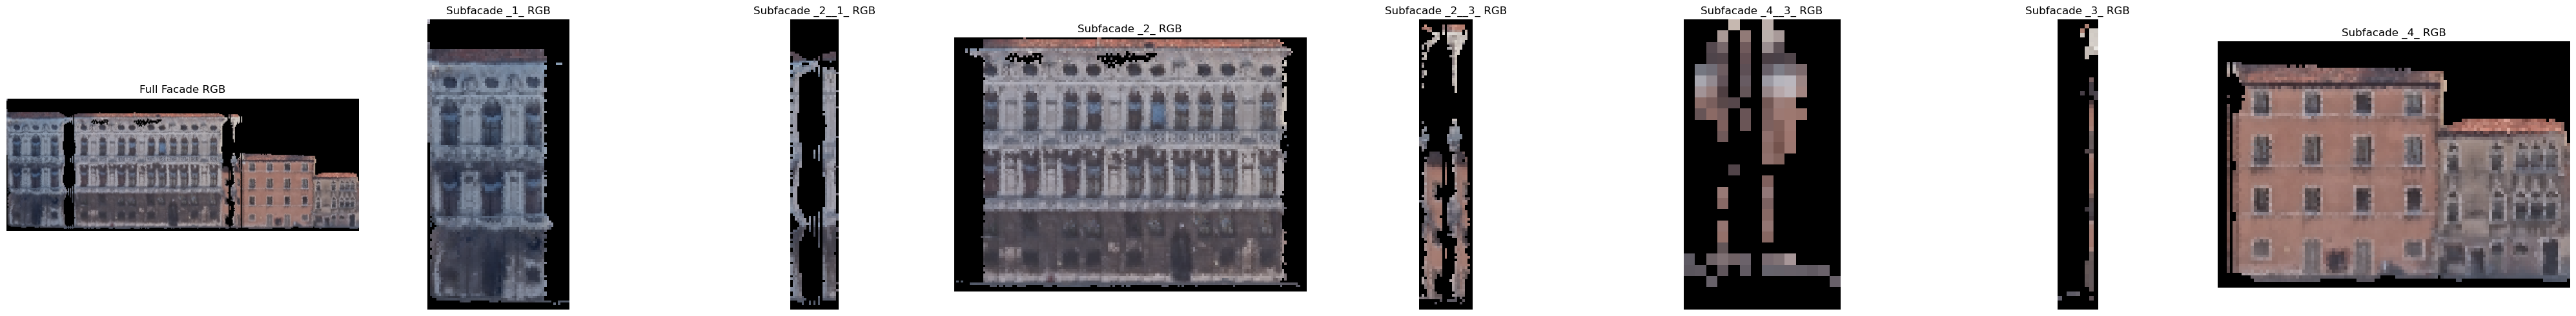

In [6]:
process_facade(
    input_file,
    output_dir="output",
    save_results=True,
    visualize_results=True,
    process_subfacades=True,
    padded_subfacades=False)

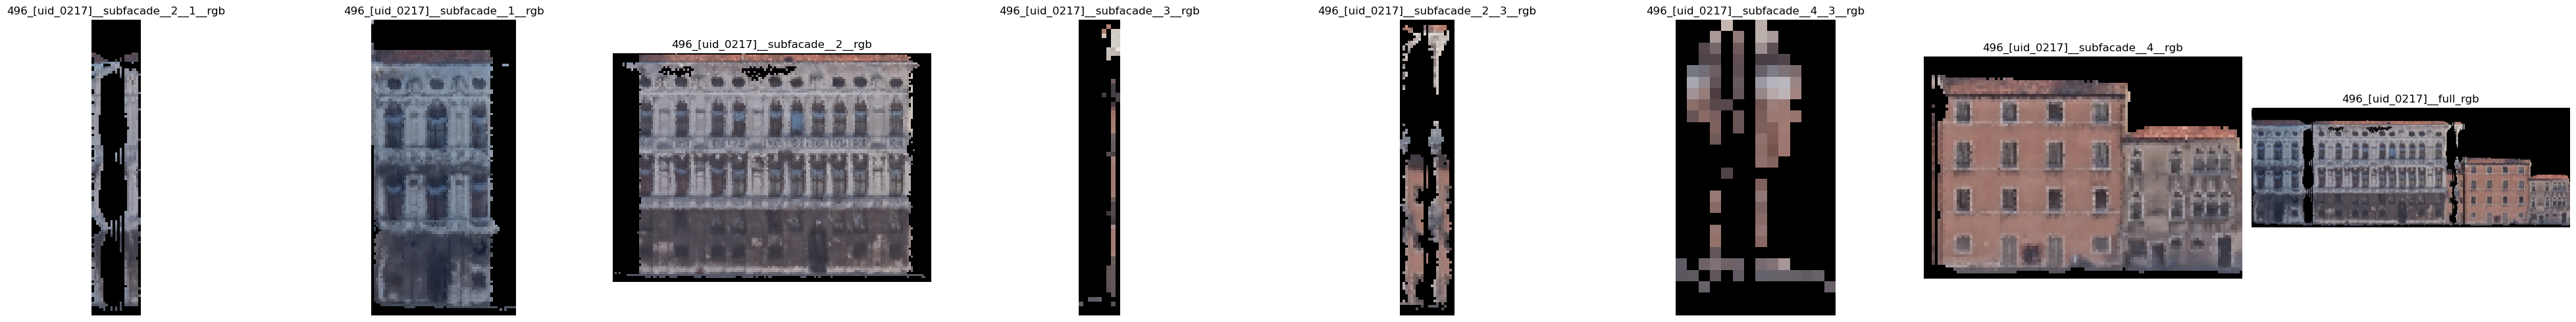

In [4]:
images_dict = load_images_from_directory('output')
visualize_images(images_dict=images_dict)

In [2]:
array_dir = "out"  # Replace with your directory path

# Collect dimensions of all arrays
dimensions = []

for file in os.listdir(array_dir):
    if file.endswith(".npy"):
        array_path = os.path.join(array_dir, file)
        array = np.load(array_path)
        dimensions.append(array.shape[:2])  # Collect (height, width)

# Convert dimensions to a numpy array for easier computation
dimensions = np.array(dimensions)
heights, widths = dimensions[:, 0], dimensions[:, 1]

# Compute statistics
stats = {
    "Height": {
        "Min": np.min(heights),
        "Max": np.max(heights),
        "Mean": np.mean(heights),
        "Median": np.median(heights),
        "10th Percentile": np.percentile(heights, 10),
        "90th Percentile": np.percentile(heights, 90),
        "95th Percentile": np.percentile(heights, 95),
    },
    "Width": {
        "Min": np.min(widths),
        "Max": np.max(widths),
        "Mean": np.mean(widths),
        "Median": np.median(widths),
        "10th Percentile": np.percentile(widths, 10),
        "90th Percentile": np.percentile(widths, 90),
        "95th Percentile": np.percentile(widths, 95),
    }
}

# Print statistics
for dimension, metrics in stats.items():
    print(f"Statistics for {dimension}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()

Statistics for Height:
  Min: 3
  Max: 406
  Mean: 78.10143493320139
  Median: 78.0
  10th Percentile: 54.0
  90th Percentile: 102.0
  95th Percentile: 110.0

Statistics for Width:
  Min: 2
  Max: 1234
  Mean: 94.78207393793737
  Median: 79.0
  10th Percentile: 35.0
  90th Percentile: 172.0
  95th Percentile: 214.0



2024-11-21 21:11:50.287373: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


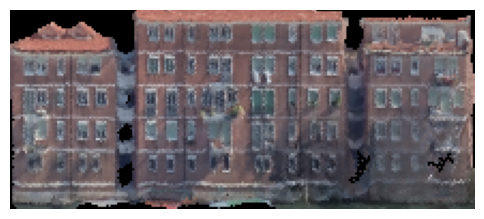

In [4]:
array_path = 'facades_npy_flipped/7924_[uid_W098]__rgb.npy'
array = np.load(array_path)

plt.figure(figsize=(6, 6))
plt.imshow(array.astype(np.uint8))  # Ensure correct type for visualization
plt.axis("off")
plt.show()

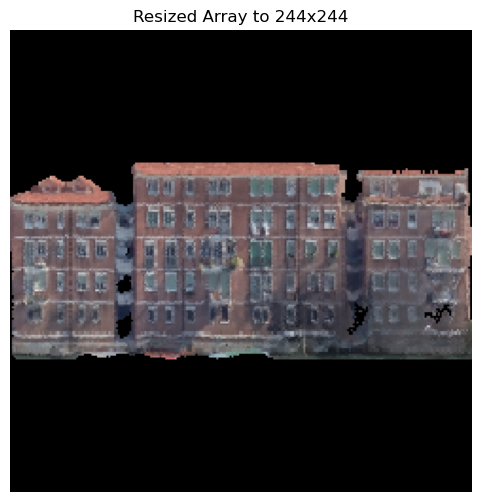

In [7]:
target_size = 244

def pad_to_standard_size(array, target_size):
    """
    Pads an array to a standard size while preserving the aspect ratio.
    """
    original_height, original_width = array.shape[:2]
    scale = target_size / max(original_height, original_width)  # Scaling factor
    new_height, new_width = int(original_height * scale), int(original_width * scale)

    # Resize the array to fit within the target size
    resized_array = tf.image.resize(array, [new_height, new_width], method='nearest')

    # Calculate padding
    pad_height = target_size - new_height
    pad_width = target_size - new_width
    pad_top = pad_height // 2
    pad_bottom = pad_height - pad_top
    pad_left = pad_width // 2
    pad_right = pad_width - pad_left

    # Pad the resized array
    if len(array.shape) == 3:  # RGB
        padded_array = tf.pad(
            resized_array, [[pad_top, pad_bottom], [pad_left, pad_right], [0, 0]], "CONSTANT"
        )
    else:  # Grayscale
        padded_array = tf.pad(
            resized_array, [[pad_top, pad_bottom], [pad_left, pad_right]], "CONSTANT"
        )

    return padded_array.numpy()

array_path = 'facades_npy_flipped/7924_[uid_W098]__rgb.npy'
array = np.load(array_path)

resized_array = pad_to_standard_size(array, target_size)
plt.figure(figsize=(6, 6))
plt.imshow(resized_array.astype(np.uint8))  # Ensure correct type for visualization
plt.title(f"Resized Array to {target_size}x{target_size}")
plt.axis("off")
plt.show()


Metrics with Padding:
  Nearest Resizing:
    MSE: 9789.5278
    PSNR: 8.2232
    SSIM: 0.0180
  Bilinear Resizing:
    MSE: 9721.5628
    PSNR: 8.2534
    SSIM: 0.0194
  Bicubic Resizing:
    MSE: 9753.8299
    PSNR: 8.2391
    SSIM: 0.0184

Metrics without Padding:
  Nearest Resizing:
    MSE: 1900.5643
    PSNR: 15.3420
    SSIM: 0.0669
  Bilinear Resizing:
    MSE: 1719.1302
    PSNR: 15.7777
    SSIM: 0.0845
  Bicubic Resizing:
    MSE: 1814.6519
    PSNR: 15.5429
    SSIM: 0.0762


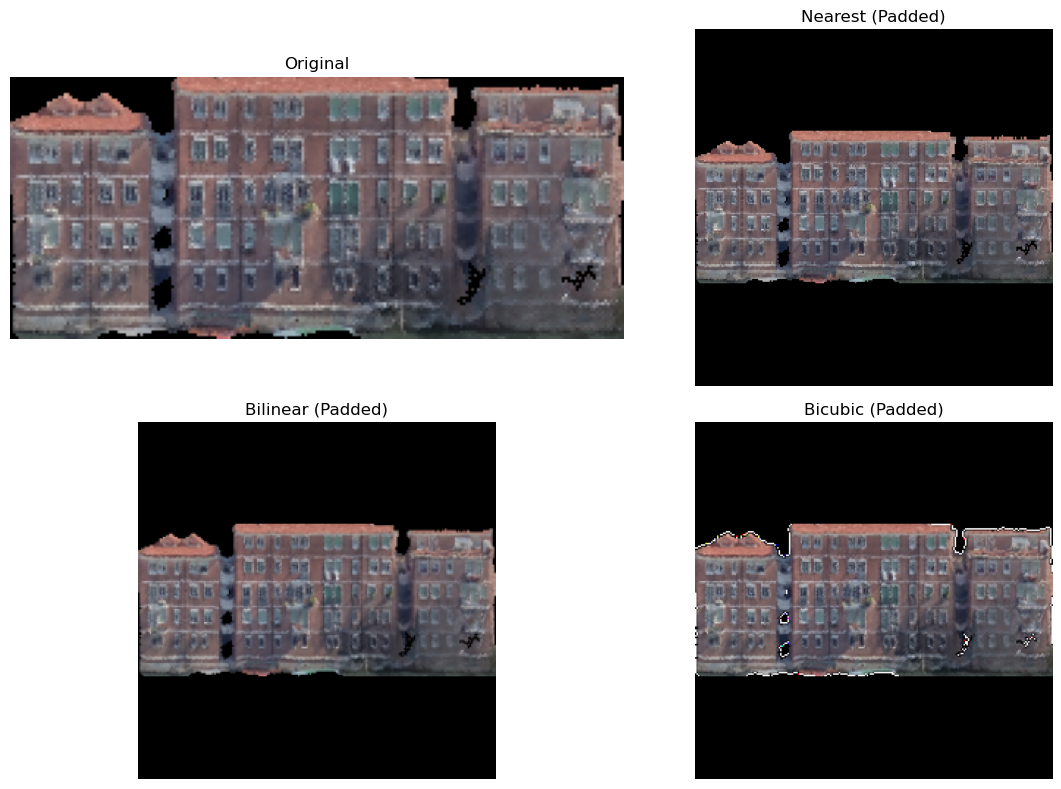

In [14]:
# Load the original array
array_path = 'facades_npy_flipped/7924_[uid_W098]__rgb.npy'
original_array = np.load(array_path)

# Target size
target_size = 244

# Function to pad and resize an array
def pad_and_resize(array, target_size, method):
    """
    Pads an array to maintain aspect ratio, then resizes it to the target size.
    """
    original_height, original_width = array.shape[:2]
    scale = target_size / max(original_height, original_width)  # Scaling factor
    new_height, new_width = int(original_height * scale), int(original_width * scale)

    # Resize the array to fit within the target size
    resized_array = tf.image.resize(array, [new_height, new_width], method=method)

    # Calculate padding
    pad_height = target_size - new_height
    pad_width = target_size - new_width
    pad_top = pad_height // 2
    pad_bottom = pad_height - pad_top
    pad_left = pad_width // 2
    pad_right = pad_width - pad_left

    # Pad the resized array
    if len(array.shape) == 3:  # RGB
        padded_array = tf.pad(
            resized_array, [[pad_top, pad_bottom], [pad_left, pad_right], [0, 0]], "CONSTANT"
        )
    else:  # Grayscale
        padded_array = tf.pad(
            resized_array, [[pad_top, pad_bottom], [pad_left, pad_right]], "CONSTANT"
        )

    return padded_array.numpy(), resized_array.numpy()  # Return both padded and resized (un-padded)

# Resize using different methods
padded_nearest, resized_nearest = pad_and_resize(original_array, target_size, method='nearest')
padded_bilinear, resized_bilinear = pad_and_resize(original_array, target_size, method='bilinear')
padded_bicubic, resized_bicubic = pad_and_resize(original_array, target_size, method='bicubic')

# Compute cropped dimensions for un-padded comparison
original_height, original_width = original_array.shape[:2]
cropped_nearest = resized_nearest[:original_height, :original_width]
cropped_bilinear = resized_bilinear[:original_height, :original_width]
cropped_bicubic = resized_bicubic[:original_height, :original_width]

# Convert to grayscale for SSIM
original_gray = np.mean(original_array, axis=-1)
nearest_gray = np.mean(cropped_nearest, axis=-1)
bilinear_gray = np.mean(cropped_bilinear, axis=-1)
bicubic_gray = np.mean(cropped_bicubic, axis=-1)

# Compute metrics for padded comparison
metrics_with_padding = {
    "Nearest": {
        "MSE": mean_squared_error(original_array, padded_nearest[:original_height, :original_width]),
        "PSNR": peak_signal_noise_ratio(original_array, padded_nearest[:original_height, :original_width], data_range=255),
        "SSIM": structural_similarity(original_gray, np.mean(padded_nearest[:original_height, :original_width], axis=-1), data_range=255)
    },
    "Bilinear": {
        "MSE": mean_squared_error(original_array, padded_bilinear[:original_height, :original_width]),
        "PSNR": peak_signal_noise_ratio(original_array, padded_bilinear[:original_height, :original_width], data_range=255),
        "SSIM": structural_similarity(original_gray, np.mean(padded_bilinear[:original_height, :original_width], axis=-1), data_range=255)
    },
    "Bicubic": {
        "MSE": mean_squared_error(original_array, padded_bicubic[:original_height, :original_width]),
        "PSNR": peak_signal_noise_ratio(original_array, padded_bicubic[:original_height, :original_width], data_range=255),
        "SSIM": structural_similarity(original_gray, np.mean(padded_bicubic[:original_height, :original_width], axis=-1), data_range=255)
    }
}

# Compute metrics for cropped (un-padded) comparison
metrics_without_padding = {
    "Nearest": {
        "MSE": mean_squared_error(original_array, cropped_nearest),
        "PSNR": peak_signal_noise_ratio(original_array, cropped_nearest, data_range=255),
        "SSIM": structural_similarity(original_gray, nearest_gray, data_range=255)
    },
    "Bilinear": {
        "MSE": mean_squared_error(original_array, cropped_bilinear),
        "PSNR": peak_signal_noise_ratio(original_array, cropped_bilinear, data_range=255),
        "SSIM": structural_similarity(original_gray, bilinear_gray, data_range=255)
    },
    "Bicubic": {
        "MSE": mean_squared_error(original_array, cropped_bicubic),
        "PSNR": peak_signal_noise_ratio(original_array, cropped_bicubic, data_range=255),
        "SSIM": structural_similarity(original_gray, bicubic_gray, data_range=255)
    }
}

# Print metrics
print("Metrics with Padding:")
for method, values in metrics_with_padding.items():
    print(f"  {method} Resizing:")
    for metric, value in values.items():
        print(f"    {metric}: {value:.4f}")

print("\nMetrics without Padding:")
for method, values in metrics_without_padding.items():
    print(f"  {method} Resizing:")
    for metric, value in values.items():
        print(f"    {metric}: {value:.4f}")

# Plot all images together
plt.figure(figsize=(12, 8))

# Original
plt.subplot(2, 2, 1)
plt.imshow(original_array.astype(np.uint8))
plt.title("Original")
plt.axis("off")

# Nearest Resized
plt.subplot(2, 2, 2)
plt.imshow(padded_nearest.astype(np.uint8))
plt.title("Nearest (Padded)")
plt.axis("off")

# Bilinear Resized
plt.subplot(2, 2, 3)
plt.imshow(padded_bilinear.astype(np.uint8))
plt.title("Bilinear (Padded)")
plt.axis("off")

# Bicubic Resized
plt.subplot(2, 2, 4)
plt.imshow(padded_bicubic.astype(np.uint8))
plt.title("Bicubic (Padded)")
plt.axis("off")

plt.tight_layout()
plt.show()

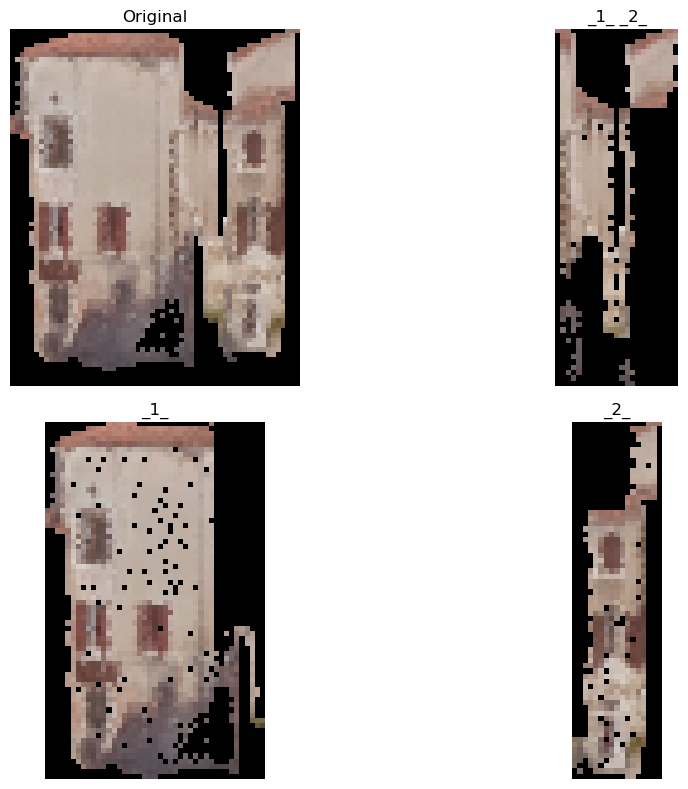

In [30]:
# Plot all images together
plt.figure(figsize=(12, 8))

original_array = np.load('facades_npy_flipped/1_[uid_1594]__rgb.npy')
sub1 = np.load('subfacades_arrays_rgb_flipped/1_[uid_1594]__subfacade_ _1_ _2__rgb.npy')
sub2 = np.load('subfacades_arrays_rgb_flipped/1_[uid_1594]__subfacade_ _1__rgb.npy')
sub3 = np.load('subfacades_arrays_rgb_flipped/1_[uid_1594]__subfacade_ _2__rgb.npy')


# Original
plt.subplot(2, 2, 1)
plt.imshow(original_array.astype(np.uint8))
plt.title("Original")
plt.axis("off")

# Nearest Resized
plt.subplot(2, 2, 2)
plt.imshow(sub1.astype(np.uint8))
plt.title("_1_ _2_")
plt.axis("off")

# Bilinear Resized
plt.subplot(2, 2, 3)
plt.imshow(sub2.astype(np.uint8))
plt.title("_1_")
plt.axis("off")

# Bicubic Resized
plt.subplot(2, 2, 4)
plt.imshow(sub3.astype(np.uint8))
plt.title("_2_")
plt.axis("off")

plt.tight_layout()
plt.show()

In [29]:
# Input directories
input_dir_rgb = "subfacades_arrays_rgb"
input_dir_depth = "subfacades_arrays_depth"

# Output directories for flipped arrays
output_dir_rgb_flipped = "subfacades_arrays_rgb_flipped"
output_dir_depth_flipped = "subfacades_arrays_depth_flipped"
os.makedirs(output_dir_rgb_flipped, exist_ok=True)
os.makedirs(output_dir_depth_flipped, exist_ok=True)

# Function to flip arrays vertically and save them
def flip_arrays(input_dir, output_dir):
    for filename in os.listdir(input_dir):
        if filename.endswith(".npy"):
            file_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            # Load the array, flip it vertically, and save it
            array = np.load(file_path)
            flipped_array = np.flipud(array)
            np.save(output_path, flipped_array)

# Flip RGB and depth arrays
flip_arrays(input_dir_rgb, output_dir_rgb_flipped)
flip_arrays(input_dir_depth, output_dir_depth_flipped)

print("All arrays flipped and saved.")

All arrays flipped and saved.


In [31]:
from tqdm import tqdm
import os
import numpy as np
import geopandas as gpd
from sklearn.linear_model import LinearRegression

# Input and output directories
input_dir = "dataframes_feather"
output_dir_rgb = "none_facades_rgb"
output_dir_depth = "none_facades_depth"
os.makedirs(output_dir_rgb, exist_ok=True)
os.makedirs(output_dir_depth, exist_ok=True)

# Get a list of all Feather files
feather_files = [f for f in os.listdir(input_dir) if f.endswith(".feather")]

# Iterate over all Feather files with a progress bar
for filename in tqdm(feather_files, desc="Processing Feather files"):
    file_path = os.path.join(input_dir, filename)

    # Load the GeoDataFrame
    gdf = gpd.read_feather(file_path)

    # Fill NaN values in RGB columns with default values (e.g., 0 for black)
    gdf[['red', 'green', 'blue']] = gdf[['red', 'green', 'blue']].fillna(0)

    # Extract only rows where subfacade is 'None'
    none_gdf = gdf[gdf['subfacade'] == 'None']

    # Skip files without 'None' subfacade points
    if none_gdf.empty:
        continue

    # Calculate perpendicular depth for all points
    sampled_gdf = none_gdf.dropna(subset=['x_pointcloud', 'y_pointcloud', 'z_pointcloud'])
    sampled_gdf = sampled_gdf.sample(n=min(10000, len(sampled_gdf)), random_state=42)

    # Extract coordinates for plane fitting
    X = sampled_gdf[['x_pointcloud', 'y_pointcloud']].values
    z = sampled_gdf['z_pointcloud'].values

    # Fit a plane to the downsampled data
    reg = LinearRegression().fit(X, z)
    a, b = reg.coef_  # Coefficients for x and y
    c = -1            # Coefficient for z in the plane equation
    d = reg.intercept_  # Intercept

    # Calculate perpendicular depth
    none_gdf['perpendicular_depth'] = (a * none_gdf['x_pointcloud'] +
                                       b * none_gdf['y_pointcloud'] +
                                       c * none_gdf['z_pointcloud'] + d) / np.sqrt(a**2 + b**2 + c**2)

    # Identify unique bins and their properties
    x_bin_unique = sorted(none_gdf['x_bin'].unique())
    y_bin_unique = sorted(none_gdf['y_bin'].unique())

    # Create a mapping from bin values to array indices
    x_bin_to_idx = {val: idx for idx, val in enumerate(x_bin_unique)}
    y_bin_to_idx = {val: idx for idx, val in enumerate(y_bin_unique)}

    # Initialize empty 3D array for RGB and 2D array for depth
    width = len(x_bin_unique)  # Number of unique x_bin values
    height = len(y_bin_unique)  # Number of unique y_bin values
    rgb_array = np.zeros((height, width, 3), dtype=np.uint8)
    depth_array = np.zeros((height, width), dtype=np.float32)
    point_counts = np.zeros((height, width), dtype=np.int32)

    # Populate the RGB and depth arrays
    for _, row in none_gdf.iterrows():
        x_bin = row['x_bin']
        y_bin = row['y_bin']
        red = int(row['red'])
        green = int(row['green'])
        blue = int(row['blue'])
        perp_depth = row['perpendicular_depth']

        # Convert bin values to array indices
        x_idx = x_bin_to_idx[x_bin]
        y_idx = y_bin_to_idx[y_bin]

        # Assign RGB values
        rgb_array[y_idx, x_idx, 0] = red
        rgb_array[y_idx, x_idx, 1] = green
        rgb_array[y_idx, x_idx, 2] = blue

        # Accumulate depth values and counts
        depth_array[y_idx, x_idx] += perp_depth
        point_counts[y_idx, x_idx] += 1

    # Average the depth values for each bin
    non_zero_bins = point_counts > 0
    depth_array[non_zero_bins] /= point_counts[non_zero_bins]

    # Flip arrays vertically to correct orientation
    rgb_array = np.flipud(rgb_array)
    depth_array = np.flipud(depth_array)

    # Save the RGB array with a modified filename
    base_filename = os.path.splitext(filename)[0]
    output_filename_rgb = f"{base_filename}_none_rgb.npy"
    output_path_rgb = os.path.join(output_dir_rgb, output_filename_rgb)
    np.save(output_path_rgb, rgb_array)

    # Save the depth array with a modified filename
    output_filename_depth = f"{base_filename}_none_depth.npy"
    output_path_depth = os.path.join(output_dir_depth, output_filename_depth)
    np.save(output_path_depth, depth_array)

print("All 'None' facades processed and saved.")

Processing Feather files: 100%|██████████| 14147/14147 [10:27<00:00, 22.56it/s]

All 'None' facades processed and saved.


In [11]:
# Input and output directories
input_dir = "dataframes_feather"
output_none_dir = "none_facades_rgb"
os.makedirs(output_none_dir, exist_ok=True)

# Process a single Feather file for `None` extraction
filename = "1_[uid_1594]_.feather"  # Replace with the filename you want to test
file_path = os.path.join(input_dir, filename)

# Load the GeoDataFrame
gdf = gpd.read_feather(file_path)

# Fill NaN values in RGB columns with default values (e.g., 0 for black)
gdf[['red', 'green', 'blue']] = gdf[['red', 'green', 'blue']].fillna(0)

# Extract only rows where subfacade is NoneType (Python's None)
none_gdf = gdf[gdf['subfacade'].isna()]

# Skip if no `None` points are present
if none_gdf.empty:
    print("No 'None' subfacade points found in this facade.")
else:
    # Identify unique bins and their properties
    x_bin_unique = sorted(none_gdf['x_bin'].unique())
    y_bin_unique = sorted(none_gdf['y_bin'].unique())

    # Create a mapping from bin values to array indices
    x_bin_to_idx = {val: idx for idx, val in enumerate(x_bin_unique)}
    y_bin_to_idx = {val: idx for idx, val in enumerate(y_bin_unique)}

    # Initialize empty 3D array for RGB
    width = len(x_bin_unique)
    height = len(y_bin_unique)
    rgb_array = np.zeros((height, width, 3), dtype=np.uint8)

    # Populate the RGB array
    for _, row in none_gdf.iterrows():
        x_bin = row['x_bin']
        y_bin = row['y_bin']
        red = int(row['red'])
        green = int(row['green'])
        blue = int(row['blue'])

        # Convert bin values to array indices
        x_idx = x_bin_to_idx[x_bin]
        y_idx = y_bin_to_idx[y_bin]

        # Assign RGB values
        rgb_array[y_idx, x_idx, 0] = red
        rgb_array[y_idx, x_idx, 1] = green
        rgb_array[y_idx, x_idx, 2] = blue

    # Save the `None` facade array
    output_filename = f"{os.path.splitext(filename)[0]}_none_rgb.npy"
    output_path = os.path.join(output_none_dir, output_filename)
    np.save(output_path, rgb_array)
    print(f"'None' subfacade extracted and saved to {output_path}.")

'None' subfacade extracted and saved to none_facades_rgb/1_[uid_1594]__none_rgb.npy.


In [12]:
from scipy.spatial import cKDTree

In [27]:
# Input directories
none_rgb_dir = "none_facades_rgb"
subfacades_rgb_dir = "subfacades_arrays_rgb_flipped"
full_facade_rgb_dir = "facades_npy_flipped"

# Output directory for merged subfacades
output_subfacades_rgb_dir = "merged_subfacades_rgb"
os.makedirs(output_subfacades_rgb_dir, exist_ok=True)

# Helper function to pad arrays to the same dimensions
def pad_array(array, target_shape):
    padded_array = np.zeros(target_shape, dtype=array.dtype)
    padded_array[:array.shape[0], :array.shape[1]] = array
    return padded_array

# Specify the single `None` file for testing
none_file = "1_[uid_1594]__none_rgb.npy"  # Replace with your `None` file name
base_filename = none_file.split("_none_rgb.npy")[0]
none_path = os.path.join(none_rgb_dir, none_file)

# Load the `None` array
none_rgb = np.load(none_path)
none_rgb = np.flipud(none_rgb)

# Load the full facade array
full_facade_path = os.path.join(full_facade_rgb_dir, f"{base_filename}_rgb.npy")
if not os.path.exists(full_facade_path):
    print(f"Full facade not found for {base_filename}. Exiting.")
else:
    full_rgb = np.load(full_facade_path)

    # Determine the target dimensions for alignment
    target_shape = (
        max(none_rgb.shape[0], full_rgb.shape[0]),
        max(none_rgb.shape[1], full_rgb.shape[1]),
        3,  # For RGB
    )

    # Pad arrays to match the target dimensions
    none_rgb = pad_array(none_rgb, target_shape)
    full_rgb = pad_array(full_rgb, target_shape)

    # Load subfacades and pad them as well
    subfacade_files = [
        f for f in os.listdir(subfacades_rgb_dir)
        if f.startswith(base_filename) and f.endswith("_rgb.npy")
    ]
    subfacade_arrays = {}
    for subfile in subfacade_files:
        sub_path = os.path.join(subfacades_rgb_dir, subfile)
        subfacade_name = subfile.split(f"{base_filename}_subfacade_")[1].replace("_rgb.npy", "")
        subfacade_array = np.load(sub_path)
        subfacade_arrays[subfacade_name] = pad_array(subfacade_array, target_shape)

    # Create a mask for each subfacade in the full facade
    subfacade_masks = {}
    for sub_name, sub_array in subfacade_arrays.items():
        subfacade_masks[sub_name] = (sub_array.any(axis=-1))  # Boolean mask

    # Assign `None` points to the correct subfacade
    none_coords = np.argwhere(none_rgb.any(axis=-1))  # Get coordinates of `None` points
    for coord in none_coords:
        assigned = False
        for sub_name, sub_mask in subfacade_masks.items():
            if sub_mask[tuple(coord)]:
                # Add `None` point to the corresponding subfacade
                subfacade_arrays[sub_name][tuple(coord)] = none_rgb[tuple(coord)]
                assigned = True
                break

        # If no subfacade mask matched, log it (this shouldn't happen if the full facade is accurate)
        if not assigned:
            print(f"Unmatched None point at {coord} for {base_filename}")

    # Save the updated subfacades
    for sub_name, sub_array in subfacade_arrays.items():
        output_path = os.path.join(output_subfacades_rgb_dir, f"{base_filename}_subfacade_{sub_name}_rgb.npy")
        np.save(output_path, sub_array)

    print(f"Subfacades for {base_filename} merged successfully.")


Unmatched None point at [ 4 55] for 1_[uid_1594]_
Unmatched None point at [ 8 57] for 1_[uid_1594]_
Unmatched None point at [20 40] for 1_[uid_1594]_
Unmatched None point at [21 24] for 1_[uid_1594]_
Unmatched None point at [22 37] for 1_[uid_1594]_
Unmatched None point at [22 42] for 1_[uid_1594]_
Unmatched None point at [23 55] for 1_[uid_1594]_
Unmatched None point at [24 42] for 1_[uid_1594]_
Unmatched None point at [28 42] for 1_[uid_1594]_
Unmatched None point at [29 42] for 1_[uid_1594]_
Unmatched None point at [30 55] for 1_[uid_1594]_
Unmatched None point at [31 42] for 1_[uid_1594]_
Unmatched None point at [33 25] for 1_[uid_1594]_
Unmatched None point at [33 55] for 1_[uid_1594]_
Unmatched None point at [35 49] for 1_[uid_1594]_
Unmatched None point at [37 42] for 1_[uid_1594]_
Unmatched None point at [37 52] for 1_[uid_1594]_
Unmatched None point at [38 51] for 1_[uid_1594]_
Unmatched None point at [38 52] for 1_[uid_1594]_
Unmatched None point at [39 42] for 1_[uid_1594]_


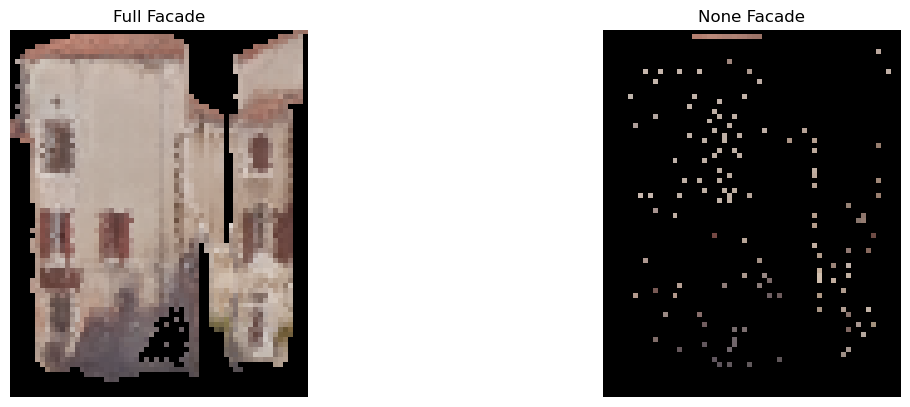

In [24]:
# Plot all images together
plt.figure(figsize=(12, 8))

# Visualize the full facade
plt.subplot(2, 2, 1)
original_array = np.load('facades_npy/1_[uid_1594]__rgb.npy')
plt.imshow(original_array, origin="lower")
plt.title("Full Facade")
plt.axis('off')

plt.subplot(2, 2, 2)
none_array = np.load('none_facades_rgb/1_[uid_1594]__none_rgb.npy')
plt.imshow(none_array, origin="lower")
plt.title("None Facade")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
unmatched_coords = np.argwhere(~np.isin(tuple(none_coords.T), original_array.any(axis=-1)))
plt.imshow(original_array, origin="lower")
plt.scatter(unmatched_coords[:, 1], unmatched_coords[:, 0], c='red', s=5, label='Unmatched None Points')
plt.legend()
plt.title("Unmatched None Points on Full Facade")
plt.show()

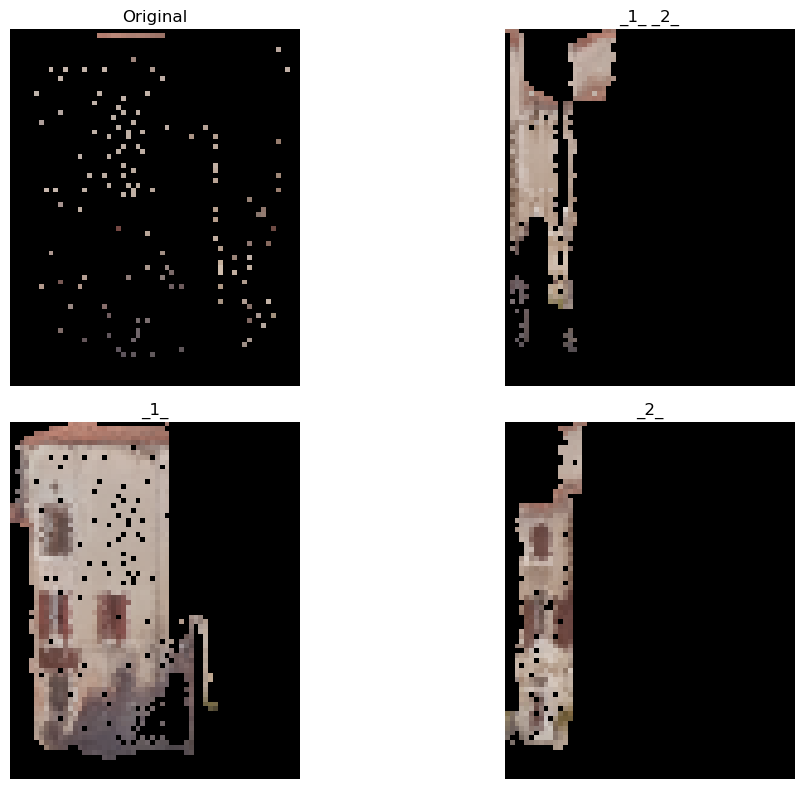

In [29]:
# Plot all images together
plt.figure(figsize=(12, 8))

original_array = np.load('none_facades_rgb/1_[uid_1594]__none_rgb.npy')
original_array = np.flipud(original_array)
sub1 = np.load('merged_subfacades_rgb/1_[uid_1594]__subfacade_ _1_ _2__rgb.npy')
sub2 = np.load('merged_subfacades_rgb/1_[uid_1594]__subfacade_ _1__rgb.npy')
sub3 = np.load('merged_subfacades_rgb/1_[uid_1594]__subfacade_ _2__rgb.npy')

# Original
plt.subplot(2, 2, 1)
plt.imshow(original_array.astype(np.uint8))
plt.title("Original")
plt.axis("off")

# Nearest Resized
plt.subplot(2, 2, 2)
plt.imshow(sub1.astype(np.uint8))
plt.title("_1_ _2_")
plt.axis("off")

# Bilinear Resized
plt.subplot(2, 2, 3)
plt.imshow(sub2.astype(np.uint8))
plt.title("_1_")
plt.axis("off")

# Bicubic Resized
plt.subplot(2, 2, 4)
plt.imshow(sub3.astype(np.uint8))
plt.title("_2_")
plt.axis("off")

plt.tight_layout()
plt.show()

In [31]:

# Input and output directories
input_dir = "dataframes_feather"
output_dir = "mapped_none_to_subfacades"
os.makedirs(output_dir, exist_ok=True)

# File to test
file_path = os.path.join(input_dir, "1_[uid_1594]_.feather")  # Replace with your file

# Load GeoDataFrame
gdf = gpd.read_feather(file_path)

# Fill NaN values in the 'subfacade' column with 'None'
gdf['subfacade'] = gdf['subfacade'].fillna('None')

# Separate points for each subfacade
subfacade_points = {}
for subfacade in gdf['subfacade'].unique():
    if subfacade != 'None':  # Skip `None`
        subfacade_points[subfacade] = gdf[gdf['subfacade'] == subfacade][['x_bin', 'y_bin']].values

# Get points for `None`
none_points = gdf[gdf['subfacade'] == 'None'][['x_bin', 'y_bin']].values

# Skip if there are no `None` points
if len(none_points) == 0:
    print("No 'None' points found in this file.")
else:
    # Build KDTree for all subfacade points
    subfacade_labels = []
    subfacade_coords = []

    for subfacade, coords in subfacade_points.items():
        subfacade_labels.extend([subfacade] * len(coords))  # Repeat label for each point
        subfacade_coords.extend(coords)

    subfacade_coords = np.array(subfacade_coords)
    subfacade_labels = np.array(subfacade_labels)

    kdtree = cKDTree(subfacade_coords)

    # Find nearest subfacade for each `None` point
    distances, indices = kdtree.query(none_points)

    # Map `None` points to their nearest subfacade
    closest_subfacades = subfacade_labels[indices]

    # Update the GeoDataFrame
    gdf.loc[gdf['subfacade'] == 'None', 'subfacade'] = closest_subfacades

    # Drop the geometry column and save as Feather
    gdf_no_geometry = gdf.drop(columns=["geometry"])
    output_path = os.path.join(output_dir, os.path.basename(file_path))
    gdf_no_geometry.to_feather(output_path)

    print(f"'None' points mapped to subfacades and saved to {output_path} without geometry.")


'None' points mapped to subfacades and saved to mapped_none_to_subfacades/1_[uid_1594]_.feather without geometry.


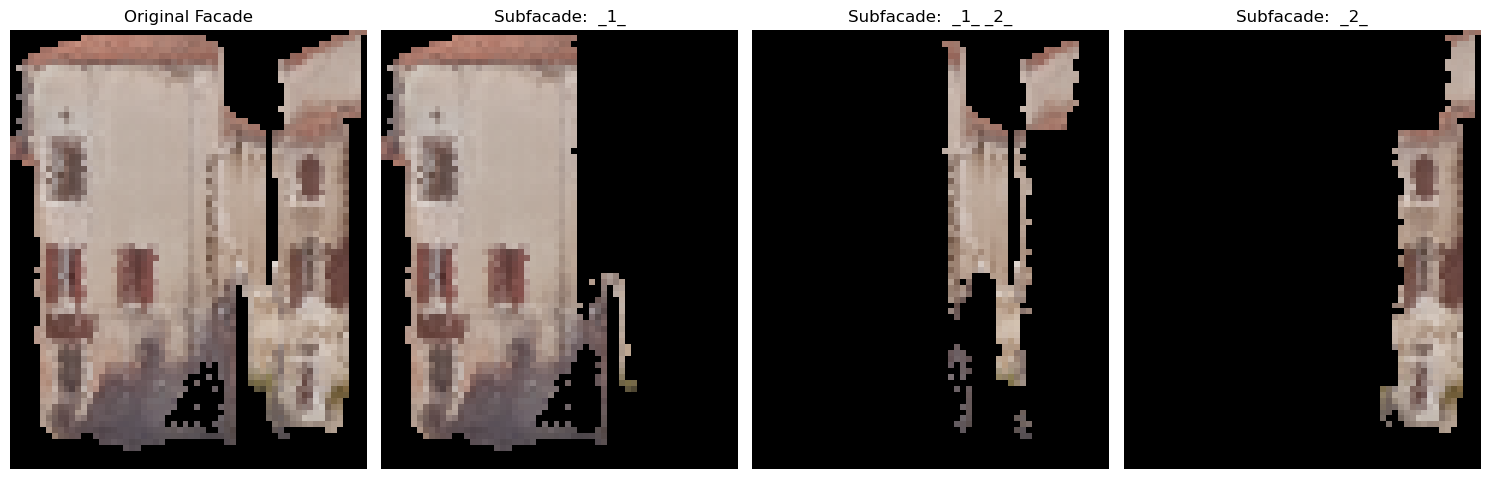

In [33]:
input_dir = "mapped_none_to_subfacades"

# Process a single Feather file for visualization
filename = "1_[uid_1594]_.feather"  # Replace with the filename you want to test
file_path = os.path.join(input_dir, filename)

# Load the GeoDataFrame
gdf = pd.read_feather(file_path)

# Fill NaN values in RGB columns with default values (e.g., 0 for black)
gdf[['red', 'green', 'blue']] = gdf[['red', 'green', 'blue']].fillna(0)

# Fill NaN in subfacade with 'None'
gdf['subfacade'] = gdf['subfacade'].fillna('None')

# Extract the original RGB array
x_bin_unique = sorted(gdf['x_bin'].unique())
y_bin_unique = sorted(gdf['y_bin'].unique())

# Create a mapping from bin values to array indices
x_bin_to_idx = {val: idx for idx, val in enumerate(x_bin_unique)}
y_bin_to_idx = {val: idx for idx, val in enumerate(y_bin_unique)}

# Initialize empty 3D array for RGB
width = len(x_bin_unique)
height = len(y_bin_unique)
original_rgb_array = np.zeros((height, width, 3), dtype=np.uint8)

# Populate the RGB array for the original facade
for _, row in gdf.iterrows():
    x_bin = row['x_bin']
    y_bin = row['y_bin']
    red = int(row['red'])
    green = int(row['green'])
    blue = int(row['blue'])

    # Convert bin values to array indices
    x_idx = x_bin_to_idx[x_bin]
    y_idx = y_bin_to_idx[y_bin]

    # Assign RGB values
    original_rgb_array[y_idx, x_idx, 0] = red
    original_rgb_array[y_idx, x_idx, 1] = green
    original_rgb_array[y_idx, x_idx, 2] = blue

# Extract unique subfacades
unique_subfacades = gdf['subfacade'].unique()

# Initialize subfacade arrays
subfacade_arrays = {}
for subfacade in unique_subfacades:
    sub_gdf = gdf[gdf['subfacade'] == subfacade]

    # Initialize empty RGB array for the subfacade
    sub_rgb_array = np.zeros((height, width, 3), dtype=np.uint8)

    # Populate the RGB array for the subfacade
    for _, row in sub_gdf.iterrows():
        x_bin = row['x_bin']
        y_bin = row['y_bin']
        red = int(row['red'])
        green = int(row['green'])
        blue = int(row['blue'])

        # Convert bin values to array indices
        x_idx = x_bin_to_idx[x_bin]
        y_idx = y_bin_to_idx[y_bin]

        # Assign RGB values
        sub_rgb_array[y_idx, x_idx, 0] = red
        sub_rgb_array[y_idx, x_idx, 1] = green
        sub_rgb_array[y_idx, x_idx, 2] = blue

    subfacade_arrays[subfacade] = sub_rgb_array

# Plot the original and subfacades
num_subfacades = len(subfacade_arrays)
fig, axes = plt.subplots(1, num_subfacades + 1, figsize=(15, 5))

# Plot the original facade
axes[0].imshow(original_rgb_array, origin="lower")
axes[0].set_title("Original Facade")
axes[0].axis("off")

# Plot each subfacade
for i, (subfacade, sub_rgb_array) in enumerate(subfacade_arrays.items(), start=1):
    axes[i].imshow(sub_rgb_array, origin="lower")
    axes[i].set_title(f"Subfacade: {subfacade}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()